In [24]:
from sklearn.preprocessing import normalize
#from scipy.cluster.hierarchy import dendrogram, linkage
#from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [25]:
#import the data
data_df = pd.read_csv(Path('Resources/crypto_data.csv'))
data_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


## Data Preparation

- Reduce data to only cryptocurrencies that are being traded
- Drop 'IsTrading', 'Unnamed: 0' and 'CoinName' columns.
- CoinName was dropped because it does not contribute to the final analysis.
- Drop all null values
- reduce data to only mined cryptocurrencies

In [3]:
#REDUCE DATA TO ONLY TRADED CURRENCIES
traded_crypto_df = data_df.loc[data_df['IsTrading']==True,:]

#verify the drop
print(traded_crypto_df['IsTrading'].unique())
traded_crypto_df.head()

[ True]


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
#DROP 'IsTrading', 'Unnamed: 0' and 'CoinName' COLUMNS
#CoinName was dropped because it does not contribute to the final analysis.
traded_crypto_df = traded_crypto_df.drop(['IsTrading', 'CoinName','Unnamed: 0'], axis=1)
print(traded_crypto_df.shape)

traded_crypto_df.head()

(1144, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,X11,PoW/PoS,NaN,2300000000
2,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SHA-256,PoW,NaN,611000
4,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
#DROP ALL NULL VALUES
traded_crypto_df = traded_crypto_df.dropna()
print(traded_crypto_df.shape)

traded_crypto_df.head()

(685, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,3.14E+11
7,SHA-256,PoW,1.792718e+07,21000000


In [6]:
#REDUCE DATA TO ONLY MINED CRYPTOCURRENCIES
traded_crypto_df = traded_crypto_df.loc[traded_crypto_df['TotalCoinsMined']>0,:]

#verify the changes
over_zero = traded_crypto_df['TotalCoinsMined']>0
print(over_zero.unique())

traded_crypto_df.head()

[ True]


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,3.14E+11
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [7]:
# CHECK DATATYPES
traded_crypto_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [8]:
#CONVERT 'TotalCoinSupply' TO NUMERIC VALUE
traded_crypto_df['TotalCoinSupply'] = pd.to_numeric(traded_crypto_df['TotalCoinSupply'])
traded_crypto_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [9]:
#CONVERT NON-NUMERICAL VALUES
traded_crypto_df = pd.get_dummies(traded_crypto_df)
traded_crypto_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.140000e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Get_Dummies is a Dummy
The get_dummies function created a column for every Algorithm and Proof Type in the data set. I'm not sure why Pandas did this instead of just creating a numerical values for each unique vaule in those data sets. 

In [12]:
#STANDARDIZE AND SCALE THE DATA
scaler = StandardScaler()
scaled_crypto = scaler.fit_transform(traded_crypto_df)

scaled_crypto

array([[-0.11710444, -0.1528531 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.0939656 , -0.14499112, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.5249554 ,  4.48749054, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09560943, -0.13216038, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694444, -0.15254276, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710163, -0.15283832, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

## Dimensionality Reduction with PCA

In [18]:
# Initialize PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the data.
crypto_pca = pca.fit_transform(scaled_crypto)

In [19]:
# Transform PCA data to a DataFrame
pca_crypto_df = pd.DataFrame(data=crypto_pca)
pca_crypto_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335034,1.032223,-0.590717,0.001397,-2.102366e-15,-1.176889e-14,9.277872e-12,-0.007118,-1.319742,-0.051872,...,1.143777e-15,5.206234e-17,2.804355e-15,-2.231138e-15,1.648008e-15,3.636677e-15,1.011227e-15,2.936810e-16,-2.170203e-15,-2.413169e-15
1,-0.318368,1.032365,-0.591129,0.001385,-2.410888e-15,-1.131673e-14,9.201784e-12,-0.007728,-1.322500,-0.056734,...,1.716876e-15,-3.159770e-16,2.570232e-15,-2.001044e-15,9.884560e-16,3.465128e-15,8.824037e-16,6.245976e-16,-2.280534e-15,-1.387026e-15
2,2.304566,1.656498,-0.683611,0.004729,-3.489902e-15,-1.879519e-14,3.151439e-11,-0.054749,-1.542613,-0.943463,...,-2.550366e-14,-6.503468e-14,-3.725593e-14,3.451180e-14,4.291557e-16,-8.151667e-14,-3.148172e-14,-2.325006e-14,1.442992e-15,4.266001e-14
3,-0.145219,-1.320603,0.192811,-0.001228,8.854156e-16,3.563234e-15,-8.184098e-12,-0.002081,0.281425,0.251807,...,-9.396683e-15,-1.248841e-14,-8.800241e-15,-5.015633e-15,5.291240e-15,-1.971132e-14,-4.038827e-15,1.045309e-16,2.387044e-15,1.249514e-14
4,-0.151823,-2.036206,0.396178,-0.001704,-2.704276e-15,9.272591e-15,-1.134836e-11,0.027719,0.519043,0.188763,...,8.357866e-14,-5.537614e-14,-4.510161e-14,-1.392125e-13,5.155087e-14,-1.409982e-14,1.837086e-14,7.466317e-14,4.032178e-14,4.374805e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471319,0.821954,-0.071118,-0.008208,1.871759e-15,-3.887723e-15,-5.491342e-11,-0.851710,2.041099,3.560319,...,-9.287454e-15,-1.143466e-14,-9.889664e-15,-9.625395e-15,5.386448e-15,-2.375497e-14,-3.759291e-15,-3.116627e-15,1.425704e-16,1.483440e-14
528,-0.333079,1.032105,-0.590744,0.001399,-2.006633e-15,-1.185502e-14,9.293277e-12,-0.007143,-1.320111,-0.052519,...,1.537236e-15,-1.197217e-16,2.696012e-15,-2.110412e-15,8.506930e-16,3.507960e-15,6.149276e-16,4.315413e-16,-2.178030e-15,-2.133354e-15
529,0.324176,-2.312318,0.421513,-0.001318,-1.064497e-15,7.919173e-15,-8.768285e-12,0.017296,0.161062,-0.047735,...,-9.381647e-15,9.275980e-15,-1.421868e-14,-4.536989e-14,-1.632093e-14,-3.446319e-14,9.097884e-15,-2.495599e-15,-1.369860e-14,3.027626e-14
530,-0.149417,-2.049350,0.412965,-0.001744,7.377197e-16,8.688179e-15,-1.160668e-11,0.028937,0.544330,0.233310,...,-1.256912e-15,1.748854e-15,2.099797e-17,1.370925e-15,-1.059546e-15,1.545410e-15,-1.670521e-15,3.772522e-16,-2.541960e-15,-1.779011e-15


It looks like the PCA reduced my 98 features to 73. 


I'm not sure if this is the correct outcome and I don't know how or why this is the outcome. Help. 

In [22]:
# RUN t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(pca_crypto_df)

tsne_features

array([[ -1.8581076,  18.96166  ],
       [ -8.472363 ,  17.924356 ],
       [ -6.4170723,  30.539204 ],
       ...,
       [ 26.047968 ,  -3.8885996],
       [ 12.936395 , -15.406994 ],
       [ -2.3207648, -11.447851 ]], dtype=float32)

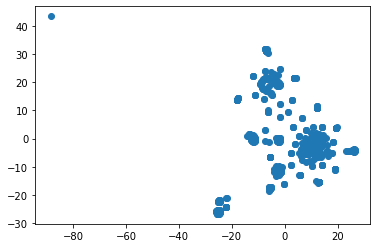

In [23]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

I see a min of about 3 clusters and perhaps a max of 5.


In [27]:
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\tayly\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,208378.265625
1,2,123504.960938
2,3,63116.394531
3,4,38693.746094
4,5,31363.974609
